# Introduction
Wazobia Real Estate Limited, a prominent Nigerian real estate company, is keen on offering its clients the most competitive pricing for properties while maintaining a substantial profit margin. However, estimating house prices accurately within the dynamic Nigerian real estate market has proven challenging. The goal was to understand the key factors that influence property prices, identify trends, and develop a reliable model to predict future prices. The data consists of properties from various locations, with features such as type of property, number of bedrooms, bathrooms, parking spaces, and geographical zones.

# Problem Statement
The primary challenge is to devise a reliable predictive model capable of estimating house prices in Nigeria's dynamic real estate market. A myriad of factors influences house prices, ranging from the location and type of property to the number of bedrooms or bathrooms, and even the availability of parking space. Determining the exact impact and relationship of these factors with property price is complex but crucial to making informed pricing decisions.

![Hackathon steps](../images/Screenshot%202022-08-24%20135305.png)


# Exploratory Data Analysis

### importing necessary libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
import missingno as msno
from pandas_profiling import ProfileReport
warnings.filterwarnings("ignore")
%matplotlib inline

In [27]:
train = pd.read_csv("../data/Housing_dataset_train.csv")

In [28]:
train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


### Dataset Overview

In [30]:
# Describe the data
train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [34]:
# making 'loc' and 'title' columns more descriptive
train = train.rename(columns={'loc': 'location', 'title': 'type'})
print("train",train.columns)

train Index(['ID', 'location', 'type', 'bedroom', 'bathroom', 'parking_space',
       'price'],
      dtype='object')
test Index(['ID', 'location', 'type', 'bedroom', 'bathroom', 'parking_space'], dtype='object')


In [38]:
# Using pandas DataFrame `fillna()` function to fill NaN values

# Filling categorical variables with 'Unknown'
train['location'] = train['location'].fillna('Unknown')
train['type'] = train['type'].fillna('Unknown')

# Filling numerical variables with mean
for column in ['bedroom', 'bathroom', 'parking_space']:
    mean_value = train[column].mean()
    train[column] = train[column].fillna(mean_value)

train.head()

,ID,location,type,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.000000,2.0,1.000000,1149999.565
1,2748,Ondo,Apartment,4.308171,2.0,4.000000,1672416.689
2,9261,Ekiti,Unknown,7.000000,5.0,3.169825,3364799.814
3,2224,Anambra,Detached duplex,5.000000,2.0,4.000000,2410306.756
4,10300,Kogi,Terrace duplex,4.308171,5.0,6.000000,2600700.898


In [10]:
#Using Pandas profilling to understand an overview of the data
profile=ProfileReport(train, title="Pandas Profiling Report",explorative=True)
# profile.to_file("EDA_Report.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Based on the pandas profiling report:

1. The dataset consists of 14,000 observations (rows) and 7 variables (columns).

2. The dataset is quite clean, with no duplicate rows found. However, there are missing values in the dataset, accounting for approximately 9.1% of the total cells.

3. The dataset uses a moderate amount of memory, approximately 2.2 MiB, and each record uses about 161.6 B on average.

4. The variables in the dataset are divided into numeric and categorical types. There are 5 numeric and 2 categorical variables.

5. A strong correlation is observed between the 'bedroom' and 'price' variables, suggesting that the number of bedrooms has a significant impact on the price of a property.

6. There are missing values present in multiple columns. About 13% of the 'loc' (location) entries, 12.3% of 'title' entries, 12.8% of 'bedroom' entries, 12.9% of 'bathroom' entries, and 12.9% of 'parking_space' entries are missing. These missing values may need to be addressed, either by imputation or removal, based on the specific context and importance of the missing data.

In summary, this dataset appears to be relatively clean but does contain missing values that will need to be addressed before further analysis or modeling. The 'bedroom' variable may be an important predictor of 'price', given their high correlation.

#### 1. How does property price vary by location?
Different locations may have different property prices due to factors like local amenities, economic conditions, and demand. Analyzing this could give insights into the most and least expensive areas.

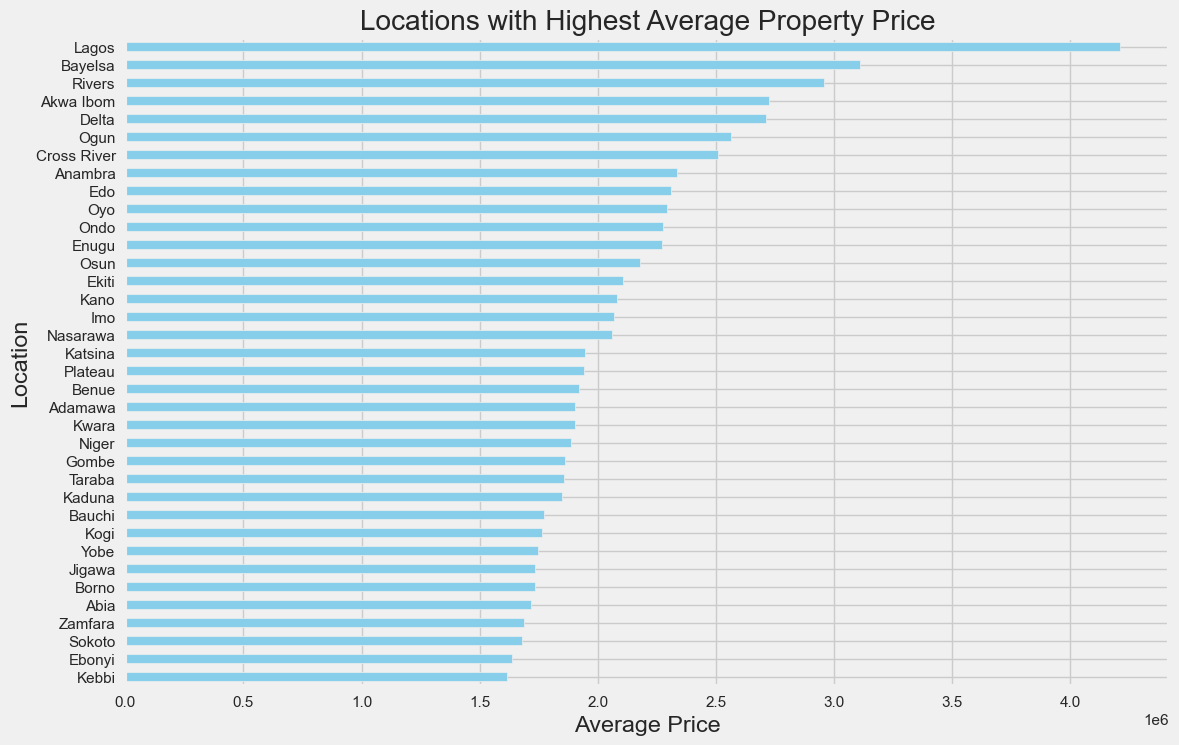

In [25]:
average_price_per_location = train.groupby('loc')['price'].mean()

# Select top 10 locations with highest average price
top_10_locations = average_price_per_location.nlargest(10)

plt.figure(figsize=(12, 8))
average_price_per_location .sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('Location')
plt.title('Locations with Highest Average Property Price')
plt.show()


Lagos has the highest average property price. This could suggest that properties in Lagos are generally more expensive than those in other locations, which could be due to various factors such as demand, economic activity, development level, among others.

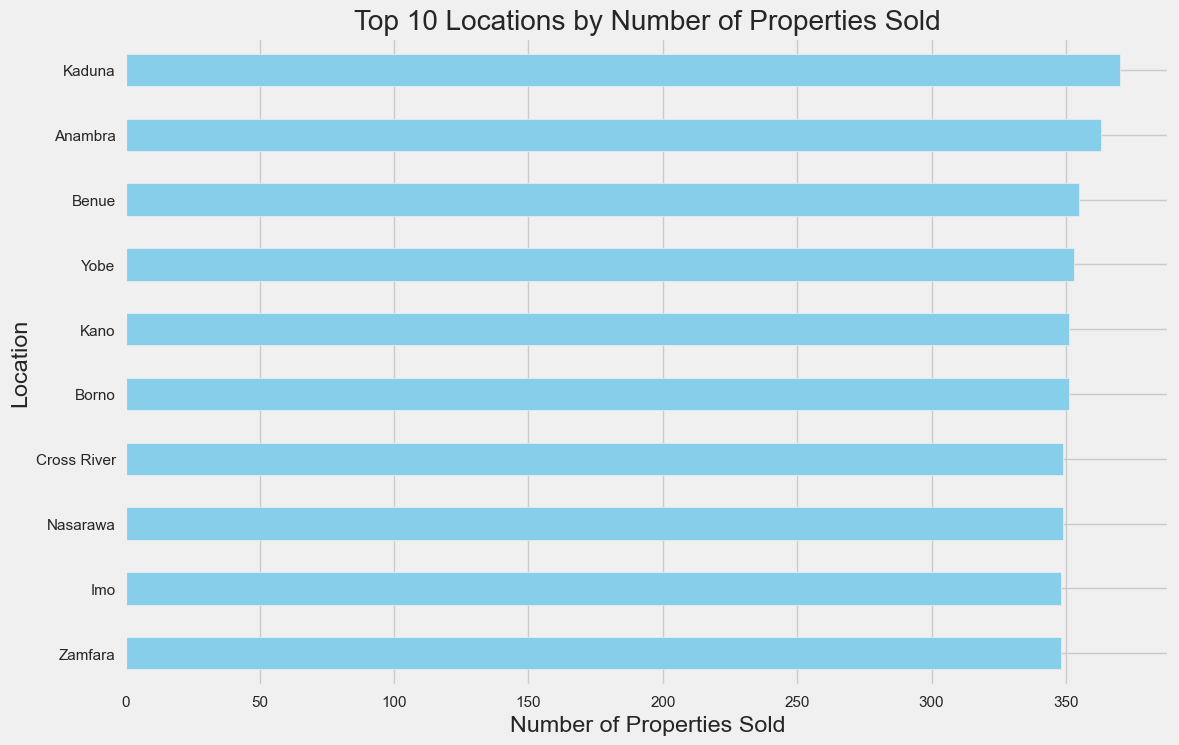

In [20]:
# Select top 10 locations with the most properties sold
number_of_properties_per_location = train['loc'].value_counts()
top_10_locations_by_sales = number_of_properties_per_location.nlargest(10)

plt.figure(figsize=(12, 8))
top_10_locations_by_sales.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Number of Properties Sold')
plt.ylabel('Location')
plt.title('Top 10 Locations by Number of Properties Sold')
plt.show()

'Kaduna' ranks first with 370 properties sold. This could suggest a high level of real estate activity in Kaduna. Factors such as demand, affordability, and economic activity could contribute to this high number.

The remaining locations on the list, 'Yobe', 'Borno', 'Kano', 'Nasarawa', 'Cross River', 'Zamfara', and 'Imo', have the number of properties sold ranging from 353 to 348. These figures suggest relatively similar levels of real estate activity in these areas.

Overall, these figures indicate that Kaduna, Anambra, and Benue have the most robust real estate markets among the locations presented, in terms of the number of properties sold. It is important to also consider other factors such as property prices and market trends for a more comprehensive understanding of the real estate market in these locations.

### 2 What is the relationship between the number of bedrooms/bathrooms/parking spaces and property price?
More bedrooms, bathrooms, or parking spaces might increase the price of a property.

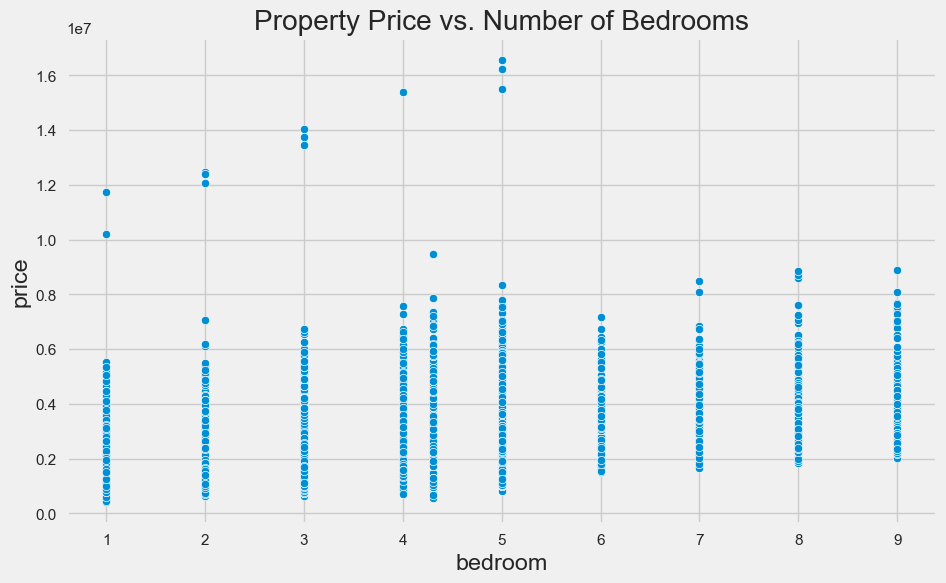

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedroom', y='price', data=train)
plt.title('Property Price vs. Number of Bedrooms')
plt.show()

The chart displays a positive correlation between the number of bedrooms in a house and the property price, indicating that houses with more bedrooms generally tend to be more expensive. However, there are exceptions, with some large houses being cheaper and some smaller ones being pricier, likely due to other factors such as location, demand, or specific features. The strength of the correlation can also vary depending on factors like city, and may change over time due to market dynamics and economic conditions. Overall, while not a perfect predictor, the number of bedrooms can be a valuable variable when estimating property prices.

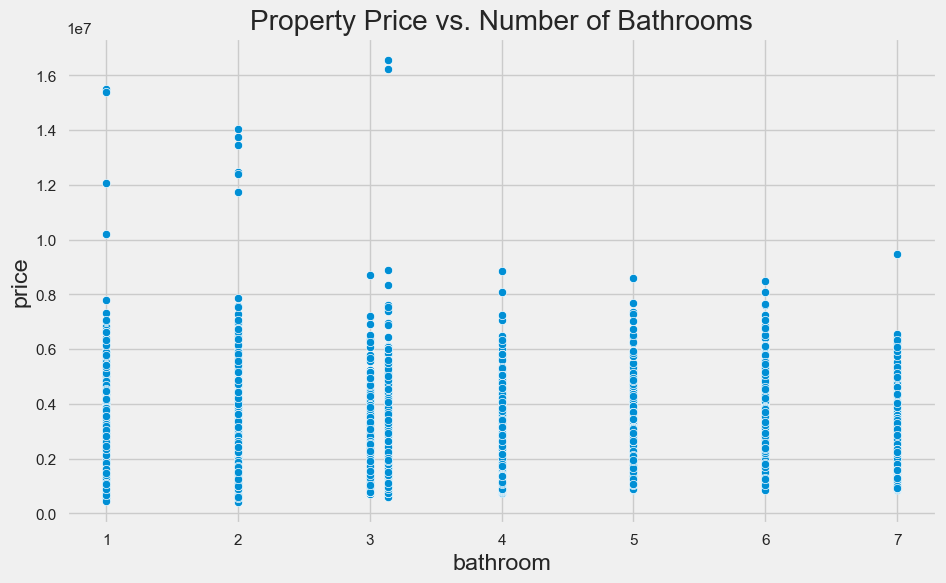

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathroom', y='price', data=train)
plt.title('Property Price vs. Number of Bathrooms')
plt.show()

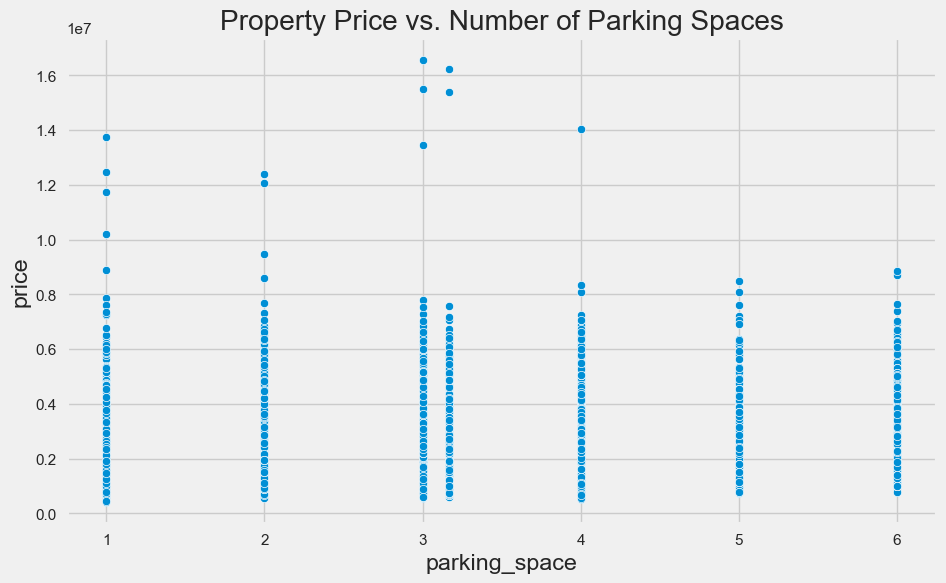

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='parking_space', y='price', data=train)
plt.title('Property Price vs. Number of Parking Spaces')
plt.show()


### 3 How does the price distribution differ across geographical zones? 
The price of property can also be influenced by the larger geographical zone it is in.

In [ ]:
#createing new feature to for geopolitical zone using location
geo_states = {
    "North_Central": ["Benue", "Kogi", "Kwara", "Nasarawa", "Niger", "Plateau"],
    "North_East": ["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe"],
    "North_West": ["Kaduna", "Katsina", "Kano", "Kebbi", "Sokoto", "Jigawa", "Zamfara"],
    "South_East": ["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"],
    "South_South": ["Akwa Ibom", "Bayelsa", "Cross River", "Delta", "Edo", "Rivers"],
    "South_West": ["Ekiti", "Lagos", "Osun", "Ondo", "Ogun", "Oyo"]
}


def add_geo_zone(data, geo_states):
    for zone, states in geo_states.items():
        data.loc[data['location'].isin(states), 'geo_zone'] = zone
    return data


train = add_geo_zone(train,geo_states )

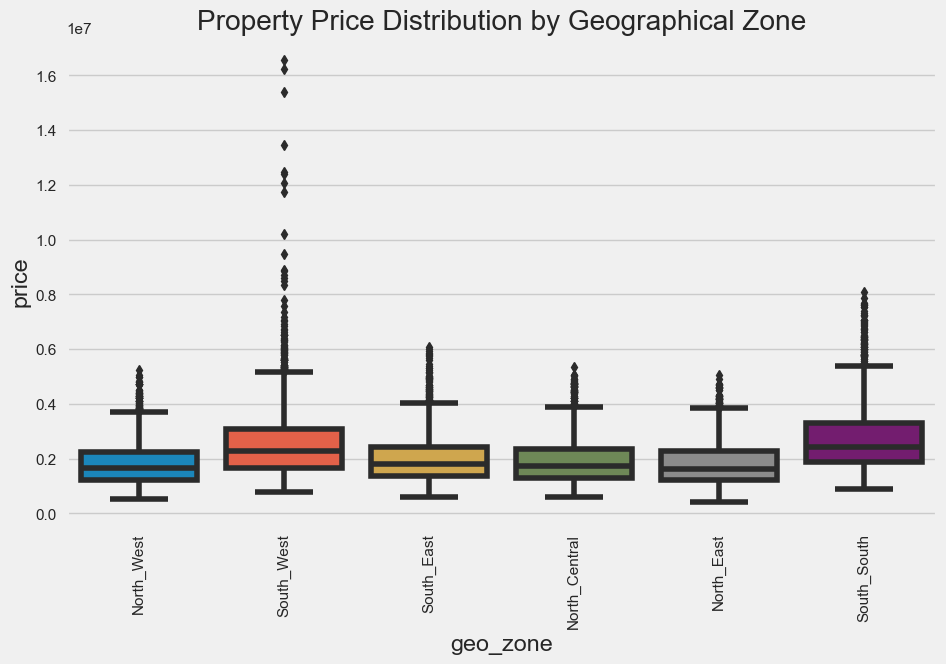

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='geo_zone', y='price', data=train)
plt.title('Property Price Distribution by Geographical Zone')
plt.xticks(rotation=90)
plt.show()

The South_West state ("Ekiti", "Lagos", "Osun", "Ondo", "Ogun", "Oyo") are considered to be have more expensive houses  followed by south south

geo_zone       type                
North_Central  Unknown                 260
               Townhouse               211
               Semi-detached duplex    195
               Bungalow                192
               Terrace duplex          192
                                      ... 
South_West     Bungalow                186
               Penthouse               186
               Detached duplex         169
               Apartment               163
               Cottage                  66
Name: type, Length: 66, dtype: int64


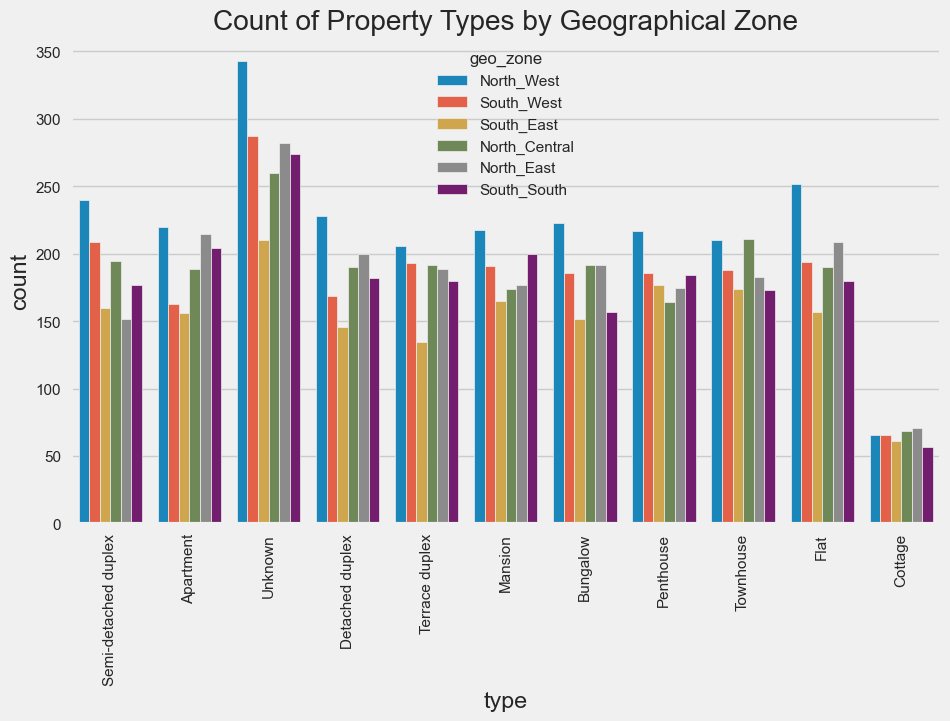

In [44]:
# Counting property types by geo zone
type_count_by_zone = train.groupby('geo_zone')['type'].value_counts()
print(type_count_by_zone)

plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='geo_zone', data=train)
plt.title('Count of Property Types by Geographical Zone')
plt.xticks(rotation=90)
plt.show()


### 4 What is the average number of bedrooms, bathrooms, and parking spaces in each location or geo zone?

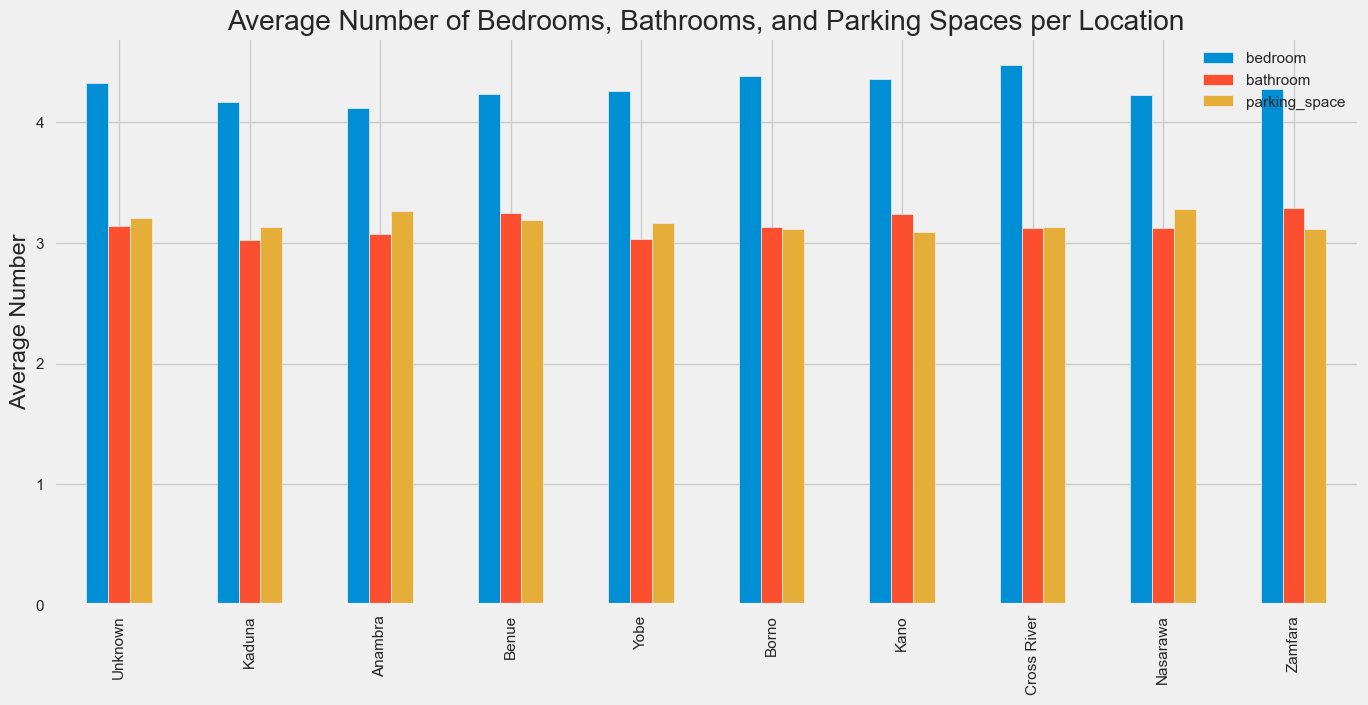

In [46]:
# Calculate average features per location
average_features_by_location = train.groupby('location')[['bedroom', 'bathroom', 'parking_space']].mean()

# Select top 10 locations with the most properties
top_10_locations = train['location'].value_counts().nlargest(10).index

# Filter average features for top 10 locations
average_features_top_10_locations = average_features_by_location.loc[top_10_locations]

# Plot
average_features_top_10_locations.plot(kind='bar', figsize=(15,7))
plt.ylabel('Average Number')
plt.title('Average Number of Bedrooms, Bathrooms, and Parking Spaces per Location')
plt.show()


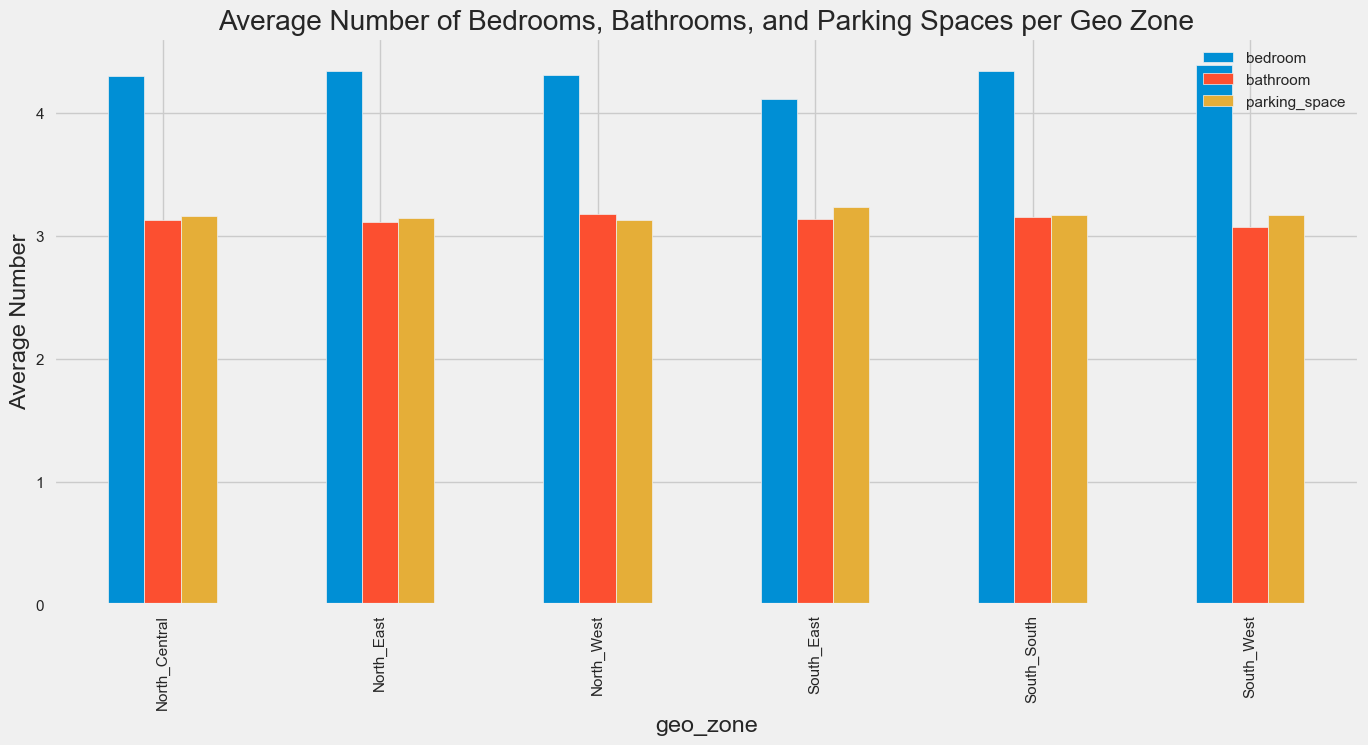

In [47]:
# Calculate average features per geo zone
average_features_by_zone = train.groupby('geo_zone')[['bedroom', 'bathroom', 'parking_space']].mean()

# Plot
average_features_by_zone.plot(kind='bar', figsize=(15,7))
plt.ylabel('Average Number')
plt.title('Average Number of Bedrooms, Bathrooms, and Parking Spaces per Geo Zone')
plt.show()


### 5 How do property characteristics and location correlate with price?

                     ID   bedroom  bathroom  parking_space     price
ID             1.000000  0.215356  0.322075       0.154381  0.167093
bedroom        0.215356  1.000000  0.195321       0.095379  0.496913
bathroom       0.322075  0.195321  1.000000       0.153675  0.204804
parking_space  0.154381  0.095379  0.153675       1.000000  0.101578
price          0.167093  0.496913  0.204804       0.101578  1.000000


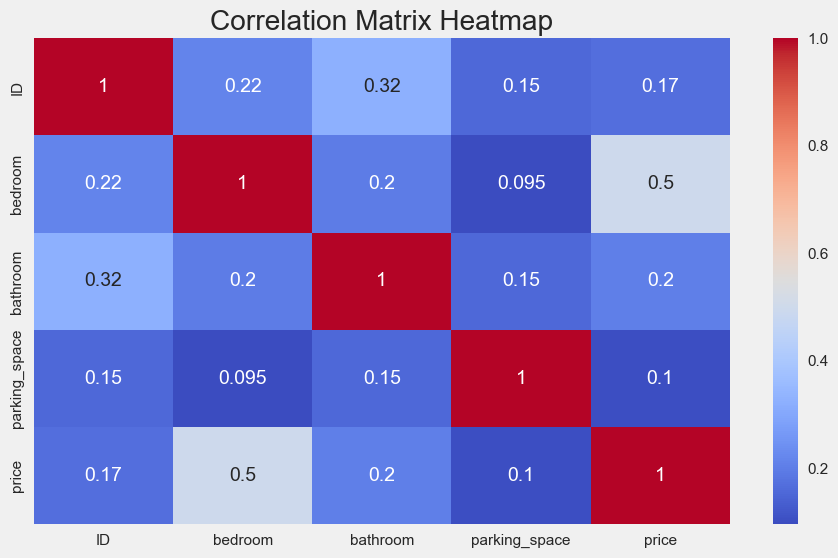

In [48]:
# Calculating the correlation matrix
correlation_matrix = train.corr()
print(correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


The correlation between 'bedroom' and 'price' is the strongest (0.497), suggesting that as the number of bedrooms in a property increases, its price also tends to increase. 'Bathroom' and 'price' have a moderate positive correlation (0.205), while 'parking_space' and 'price' have a relatively weaker positive correlation (0.102).

'ID' seems to have a weaker relationship with other variables, which makes sense because it's usually a unique identifier for each property, not a feature that would directly impact the price.

Please note that correlation does not imply causation; these relationships might be influenced by other factors not included in this dataset.